# Telecommunication Churn Analysis - EDA

<b>Dataset Info:</b> Sample Data Set containing Telecommunication customer data and showing customers that left last month

 Importing libraries :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

Loading data file :

In [2]:
telecom_churn_base_data = pd.read_csv('Telecom_Churn (WA_Fn-UseC_-Telco-Customer-Churn).csv')

Top 5 records of data :

In [3]:
telecom_churn_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Various attributes of data :

In [4]:
telecom_churn_base_data.shape

(7043, 21)

In [5]:
telecom_churn_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Descriptive statistics of numeric variables :

In [6]:
telecom_churn_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is a categorical variable, hence distribution is not proper.

75% of customers have a tenure less than 55 months (75th percentile)

Average (mean) Monthly Charges are USD 64.76, whereas 75% of customers pay more than USD 89.85 per month

In [7]:
telecom_churn_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
churn_percent=100*(telecom_churn_base_data['Churn'].value_counts()/len(telecom_churn_base_data['Churn']))
churn_percent

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Data in unbalanced

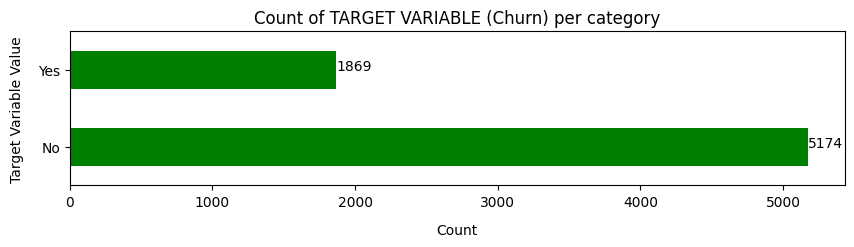

In [9]:
churn_counts = telecom_churn_base_data['Churn'].value_counts()
ax = churn_counts.plot(kind='barh', figsize=(10, 2), color = 'green')
plt.title("Count of TARGET VARIABLE (Churn) per category")
plt.xlabel("Count",labelpad = 10)
plt.ylabel("Target Variable Value",labelpad = 10)

for i, value in enumerate(churn_counts):
    plt.text(value, i, str(value))

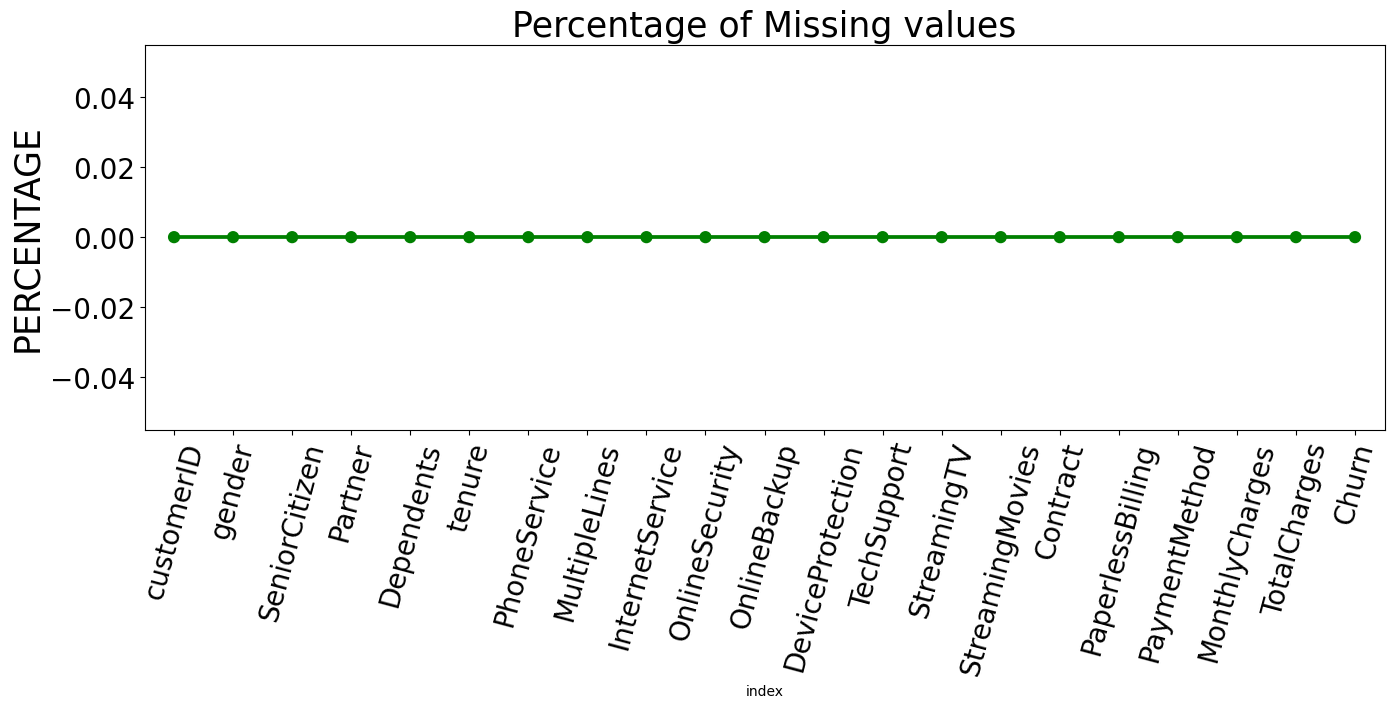

In [10]:
missing_data_percent = pd.DataFrame((telecom_churn_base_data.isnull().sum())*100/telecom_churn_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x = 'index', y = 0, data = missing_data_percent, color = 'green')
plt.xticks(rotation = 75, fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("Percentage of Missing values", fontsize = 25)
plt.ylabel("PERCENTAGE", fontsize = 25)
plt.show()

Here, we do not have any missing data

## Data Cleaning

Creating a copy of Base data for manipulation and processing :

In [11]:
telecom_data = telecom_churn_base_data.copy()

TotalCharges is converted to numerical data type and missing values are found :

In [12]:
telecom_data.TotalCharges = pd.to_numeric(telecom_data.TotalCharges, errors = 'coerce')
telecom_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in TotalCharges column

Checking these records :

In [13]:
telecom_data.loc[telecom_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
100*telecom_data['TotalCharges'].isnull().sum()/telecom_data.shape[0]

0.15618344455487718

<b>Missing Value Treatment</b>

Since the percentage of these records compared to total dataset is very low, ie 0.15%, it is safe to ignore them from further processing.

In [15]:
# Removing missing values 
telecom_data.dropna(how = 'any', inplace = True)

Dividing customers into bins based on tenure e.g. <br>
for tenure < 12 months : assign a tenure group of 1-12, <br> 
for tenure between 1 to 2 Years : tenure group of 13-24 and so on

In [16]:
# printing the max tenure
print(telecom_data['tenure'].max()) 

72


In [17]:
# Grouping the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telecom_data['tenure_group'] = pd.cut(telecom_data.tenure, range(1, 80, 12), right = False, labels = labels)

telecom_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

Removing columns not required for processing :

In [18]:
#drop column customerID and tenure
telecom_data.drop(columns= ['customerID','tenure'], axis = 1, inplace = True)
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

Plot distribution of individual predictors by churn :

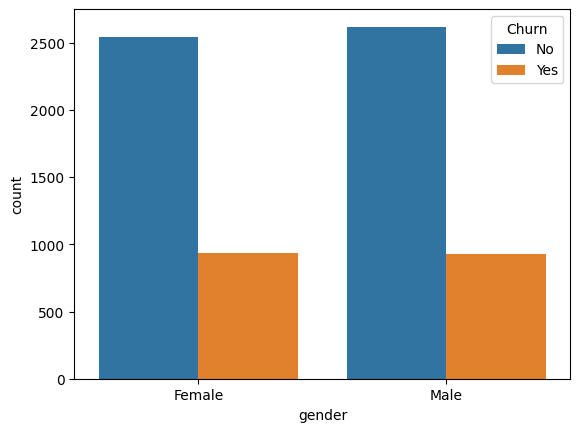

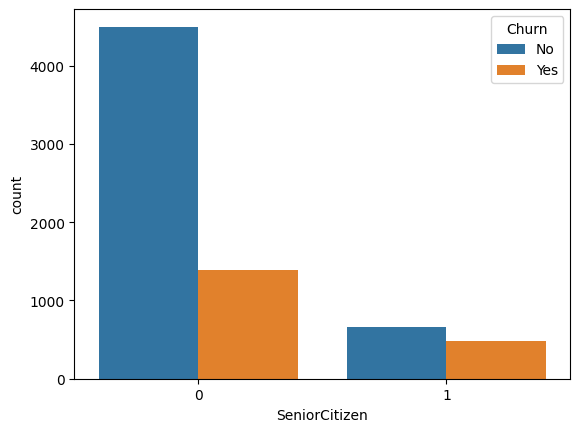

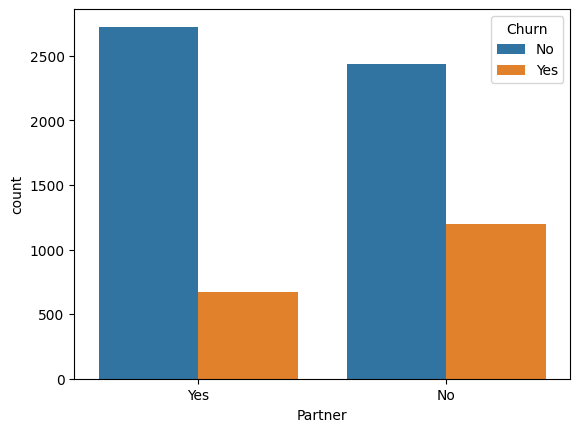

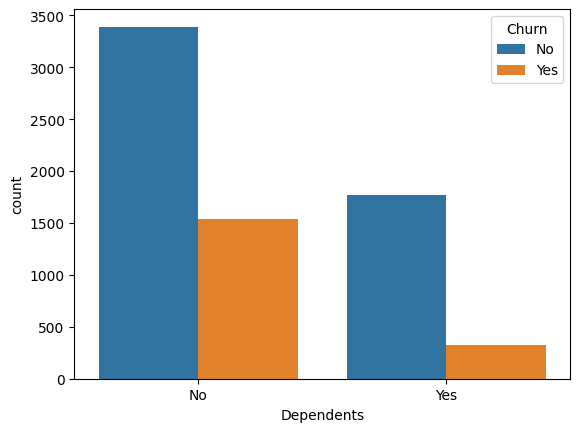

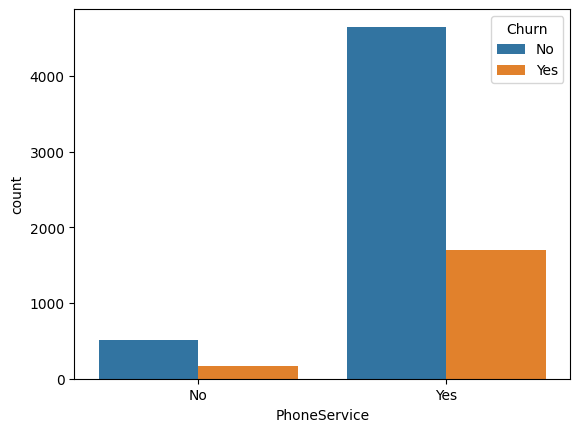

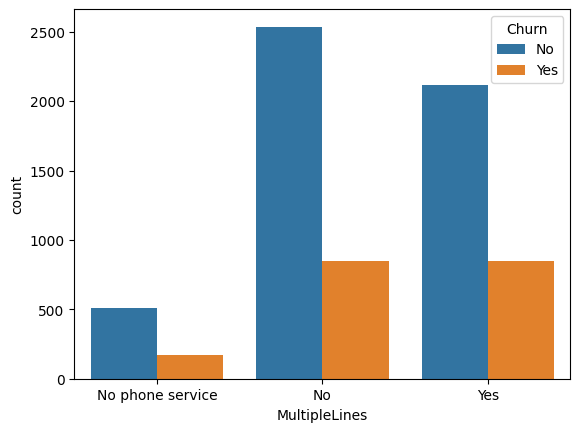

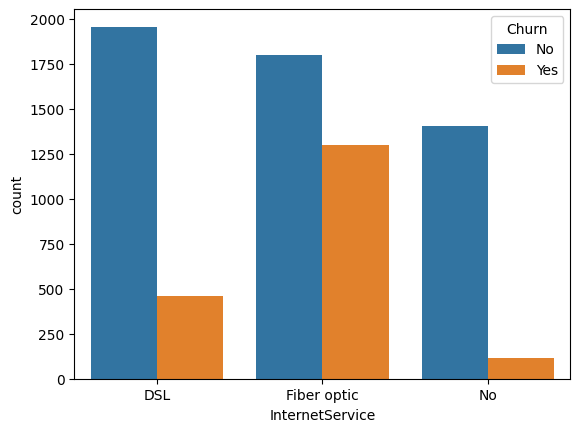

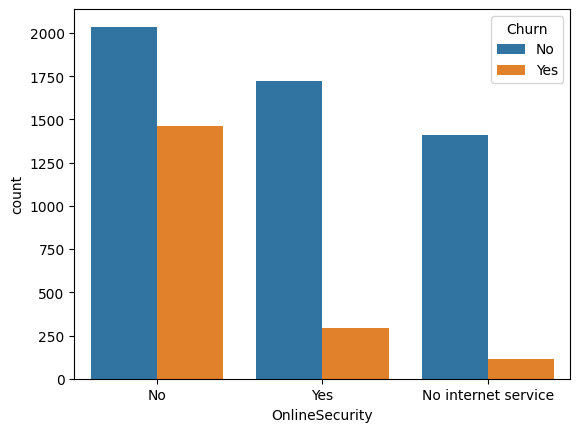

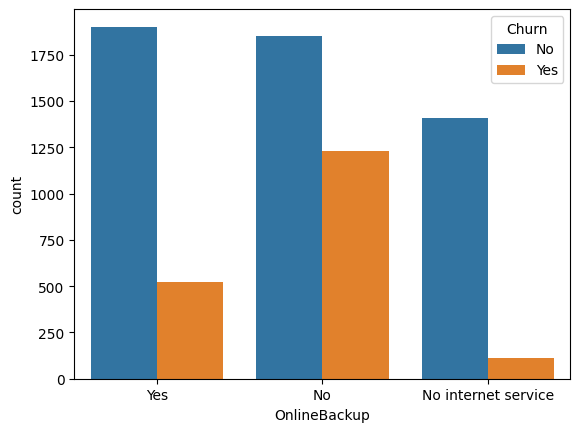

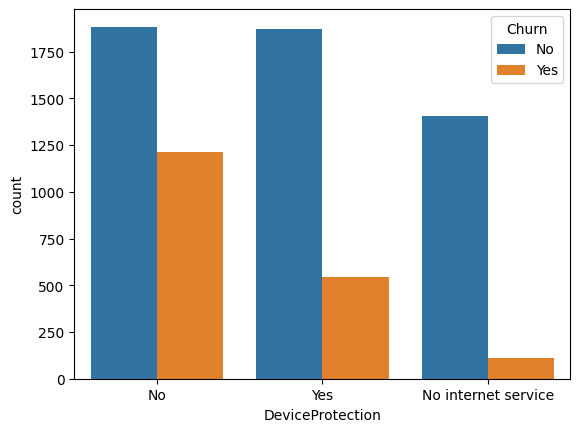

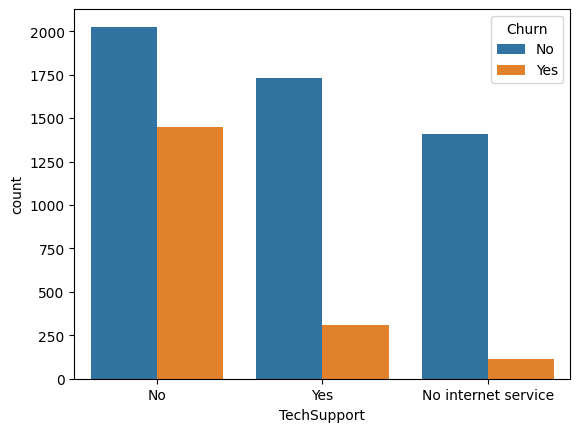

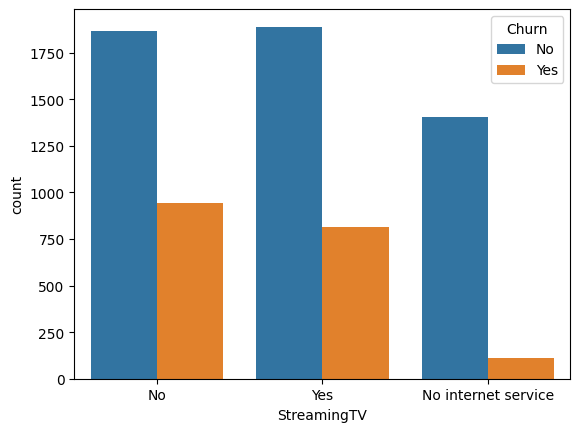

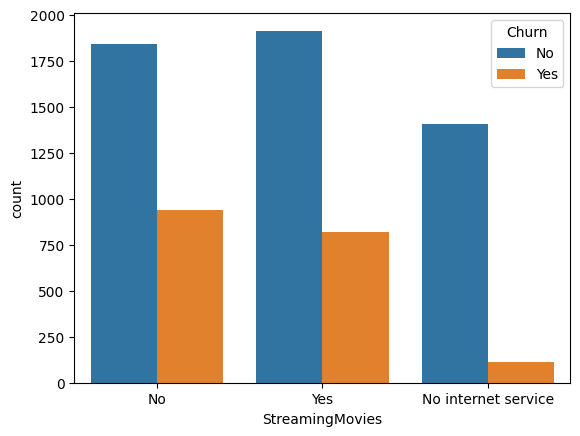

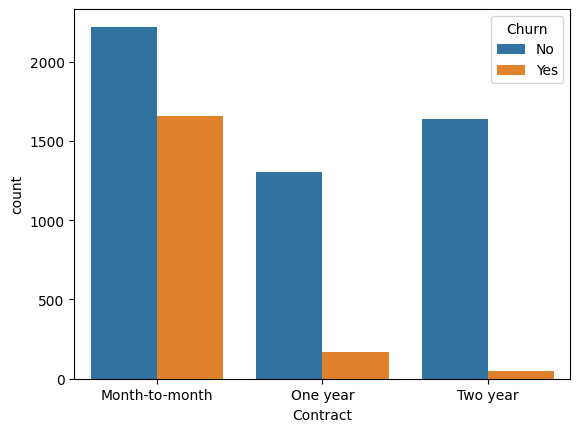

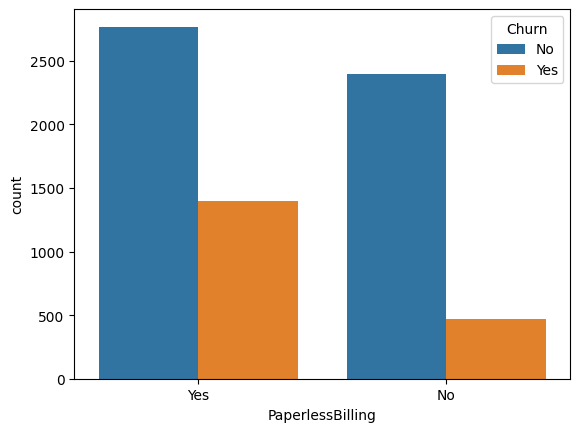

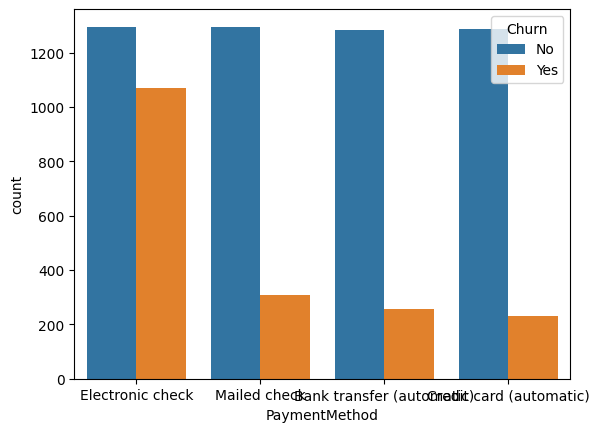

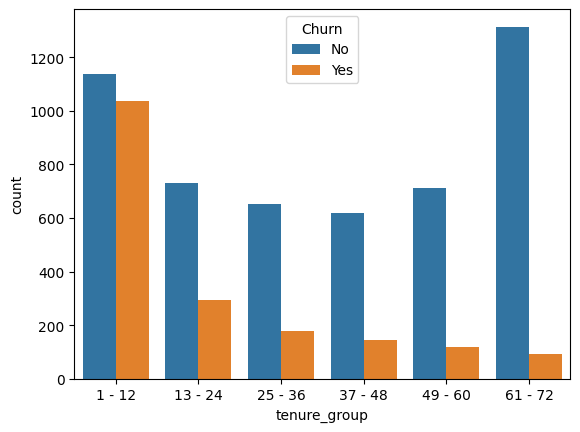

In [19]:
for i, predictor in enumerate(telecom_data.drop(columns = ['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = telecom_data, x = predictor, hue = 'Churn')

Converting target variable 'Churn' to a binary numeric variable, i.e, Yes = 1 ; No = 0

In [20]:
telecom_data['Churn'] = np.where(telecom_data.Churn == 'Yes', 1, 0)
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [21]:
telecom_data.to_csv('first_Telecom (maybe).csv')

Converting all the categorical variables into dummy variables :

In [22]:
telecom_data_dummies = pd.get_dummies(telecom_data)
telecom_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [23]:
telecom_data_dummies.columns.tolist()

['SeniorCitizen',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank trans

Relationship between Monthly Charges and Total Charges :

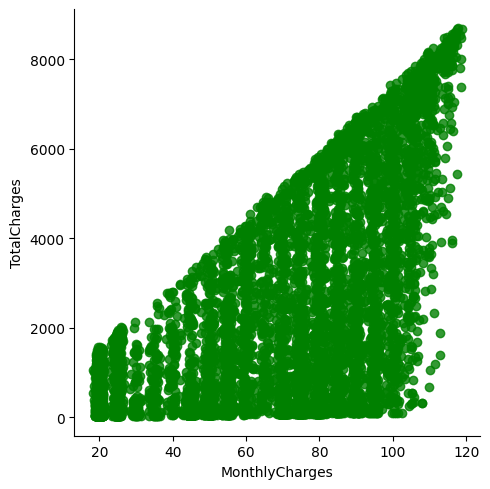

In [24]:
sns.lmplot(data = telecom_data_dummies, x = 'MonthlyCharges', y = 'TotalCharges', fit_reg = False, scatter_kws={'color' : 'green'})

Churn by Monthly Charges and Total Charges :

Text(0.5, 1.0, 'Monthly charges by churn')

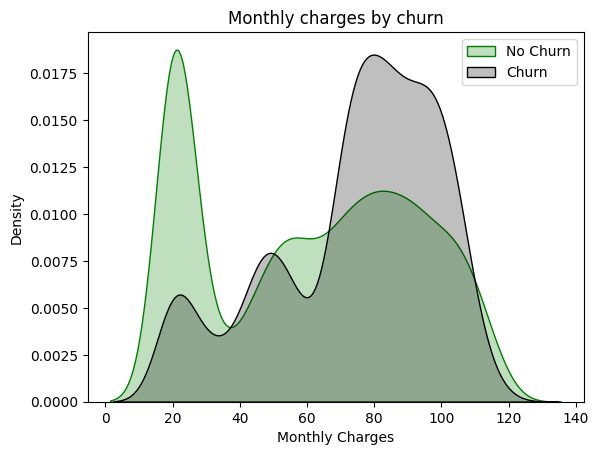

In [25]:
Mth = sns.kdeplot(telecom_data_dummies.MonthlyCharges[(telecom_data_dummies["Churn"] == 0) ],
                color="green", fill = True)
Mth = sns.kdeplot(telecom_data_dummies.MonthlyCharges[(telecom_data_dummies["Churn"] == 1) ],
                ax = Mth, color = "black", fill = True)
Mth.legend(["No Churn","Churn"], loc = 'upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

<b>Insight :</b> Churn is high when Monthly Charges are high

Text(0.5, 1.0, 'Total charges by churn')

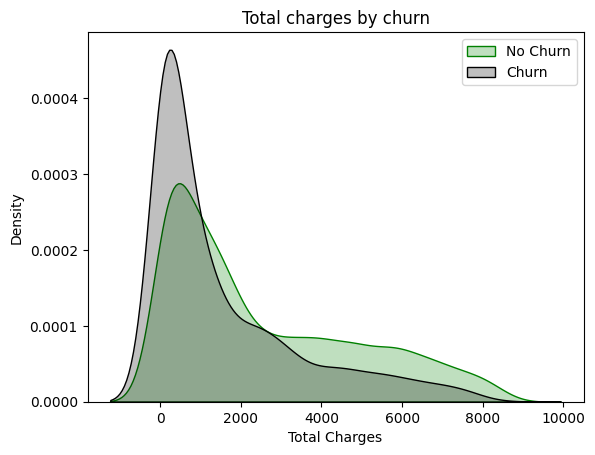

In [26]:
Tot = sns.kdeplot(telecom_data_dummies.TotalCharges[(telecom_data_dummies["Churn"] == 0) ],
                color="green", fill = True)
Tot = sns.kdeplot(telecom_data_dummies.TotalCharges[(telecom_data_dummies["Churn"] == 1) ],
                ax = Tot, color="black", fill = True)
Tot.legend(["No Churn", "Churn"], loc = 'upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

<b>Surprising insight :</b> as Churn gets higher, Total Charges lower

However, if we combine the insights of 3 parameters, i.e. Tenure, Monthly Charges & Total Charges then the picture becomes clearer :<br> Higher Monthly Charge at lower tenure results in lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

Building a corelation of all predictors with 'Churn' :

<Axes: >

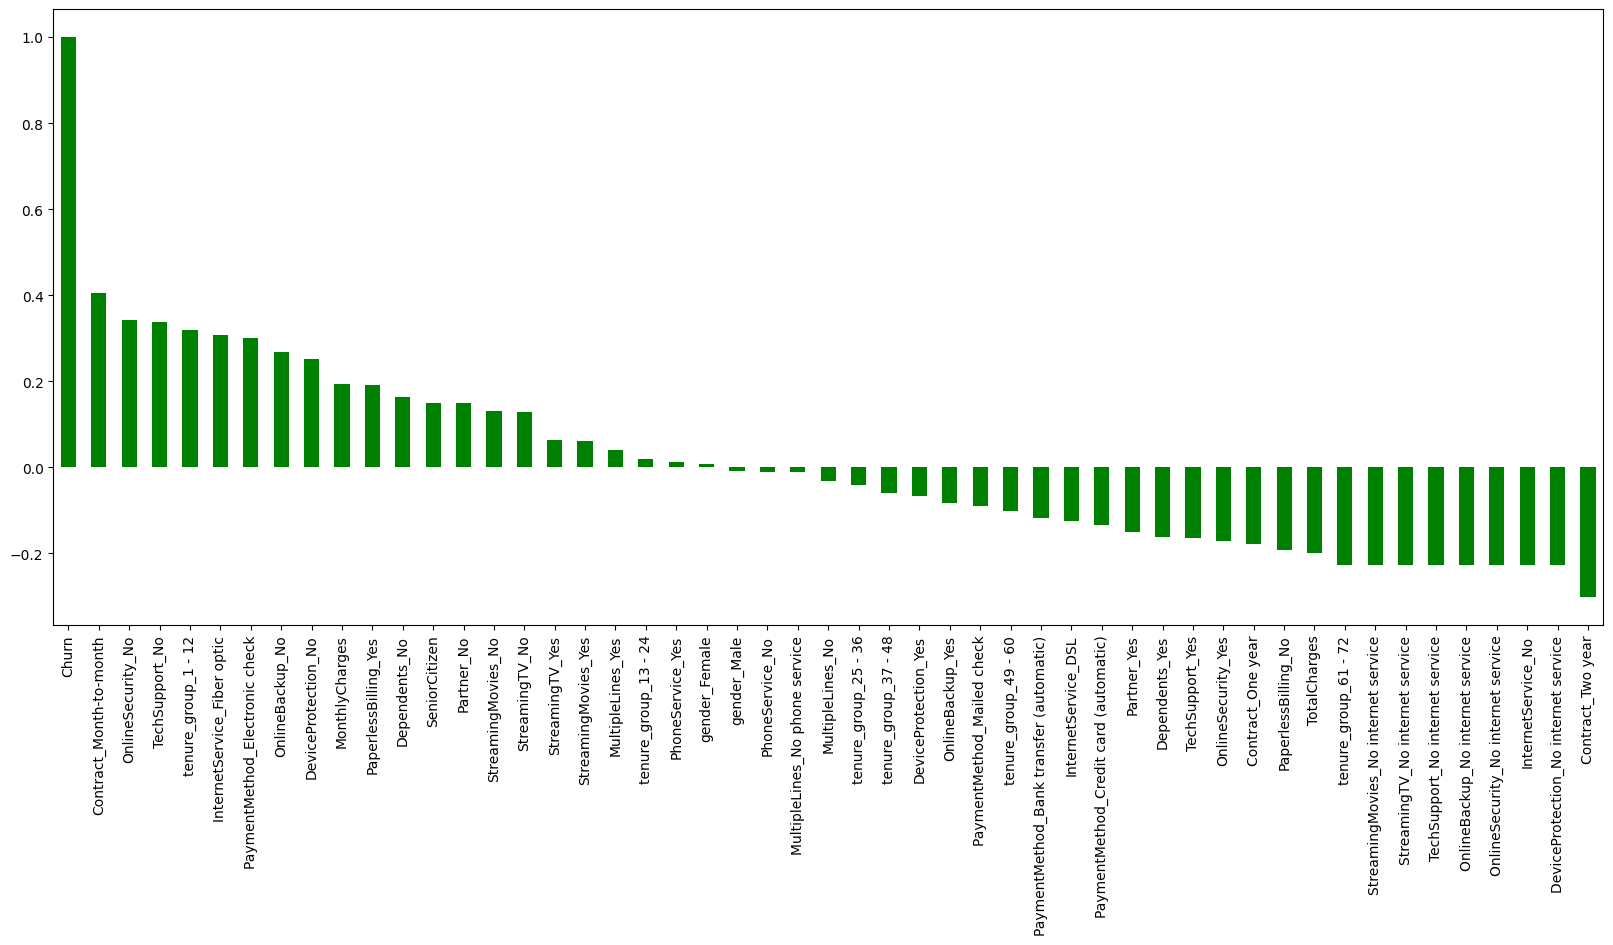

In [27]:
plt.figure(figsize=(20,8))
telecom_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color = 'green')

<b>Derived Insights :</b>

HIGH Churn is seen in case of month to month contracts, no online security, no tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and number of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below :

<Axes: >

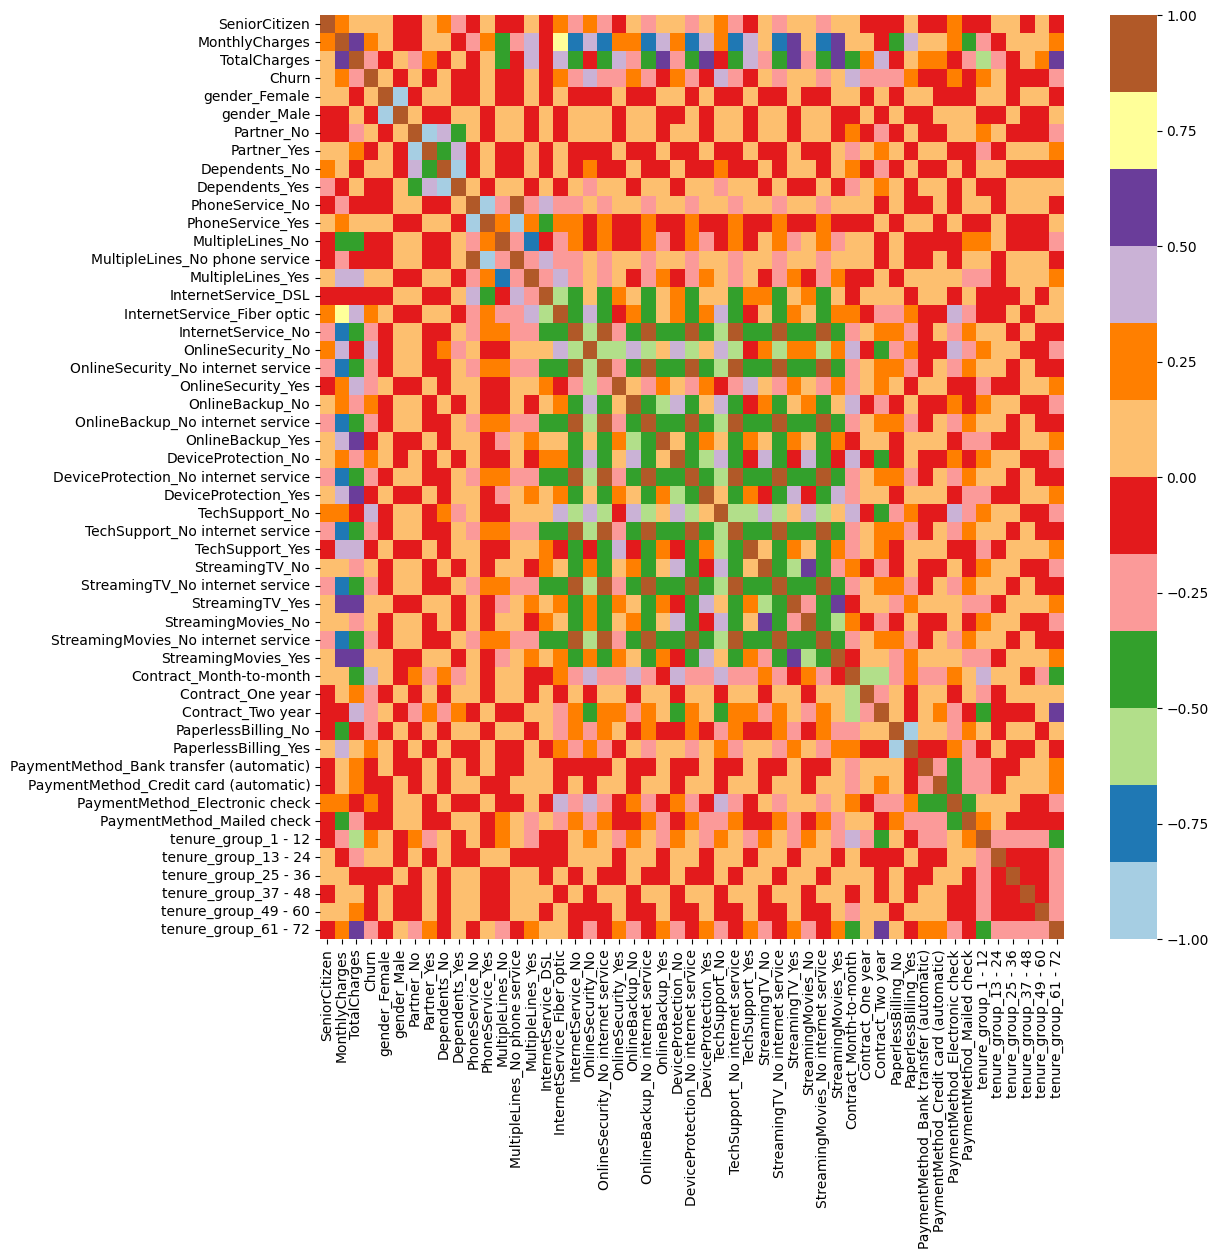

In [28]:
plt.figure(figsize = (12,12))
sns.heatmap(telecom_data_dummies.corr(), cmap = "Paired")

## Bivariate Analysis 

In [29]:
new_df1_target0 = telecom_data.loc[telecom_data["Churn"] == 0]
new_df1_target1 = telecom_data.loc[telecom_data["Churn"] == 1]

In [30]:
def uniplot(df, col, title, colors, hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width ,8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue,palette = colors) 
        
    plt.show()

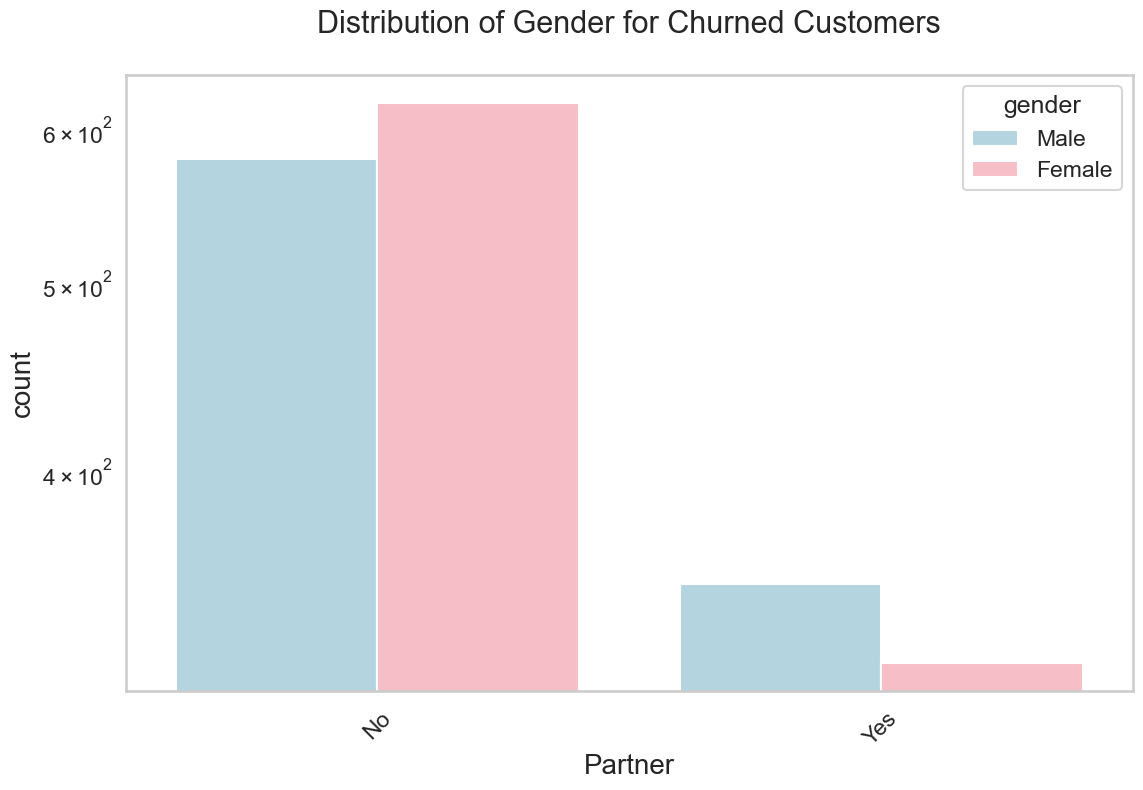

In [31]:
uniplot(new_df1_target1, col = 'Partner', title = 'Distribution of Gender for Churned Customers',
    colors = ["lightblue", "lightpink"], hue = 'gender')

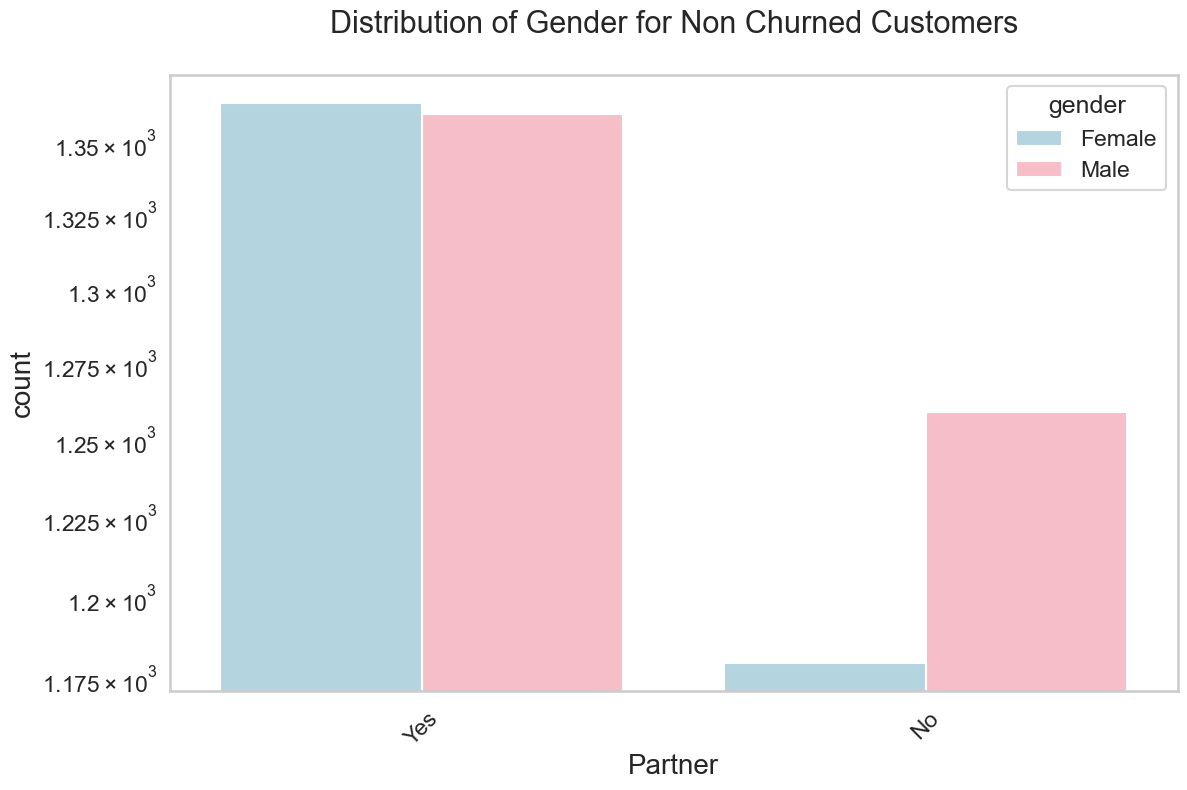

In [32]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',colors = ["lightblue", "lightpink"], hue='gender')

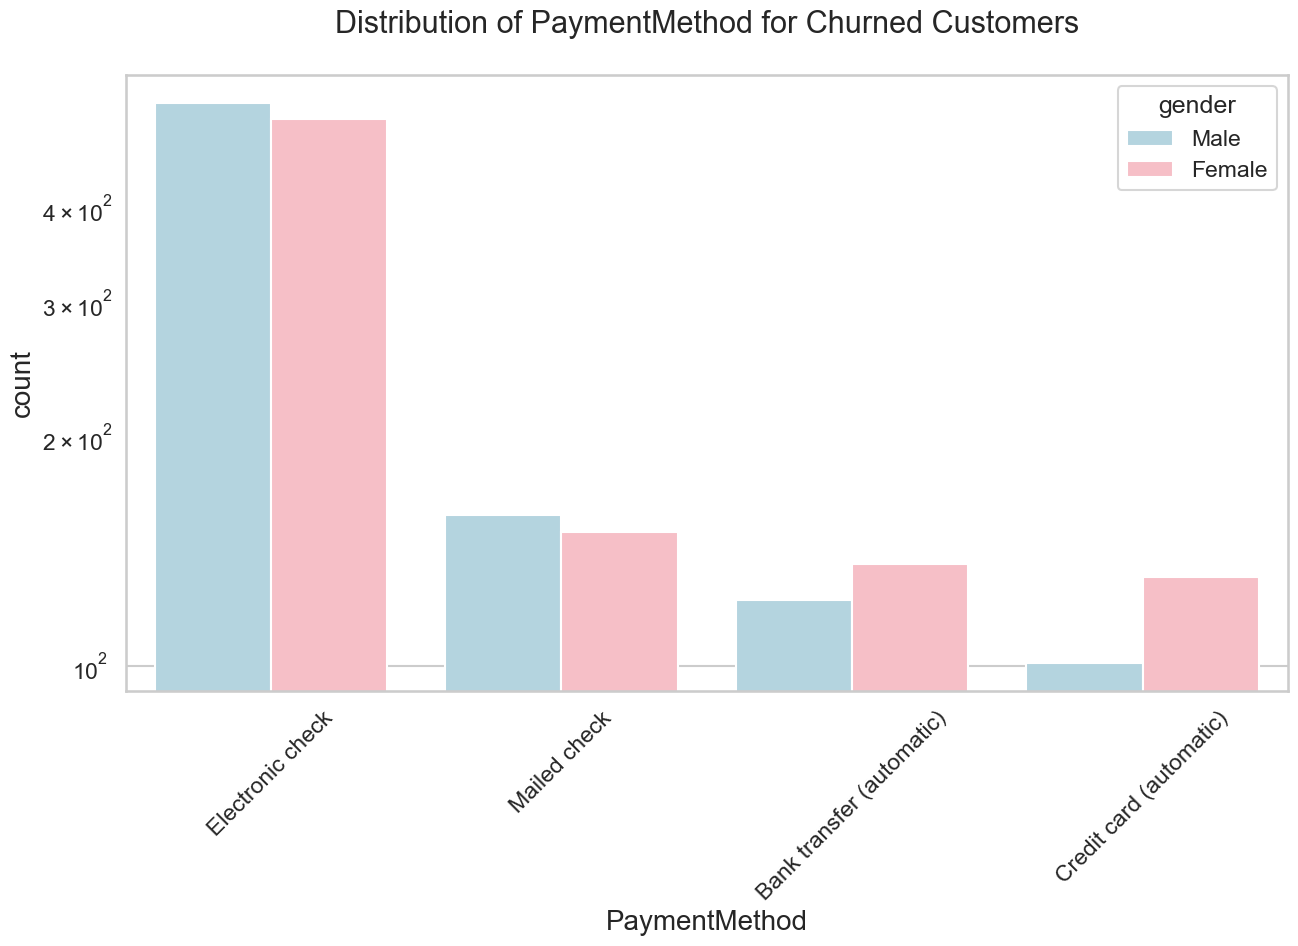

In [33]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',colors = ["lightblue", "lightpink"], hue='gender')

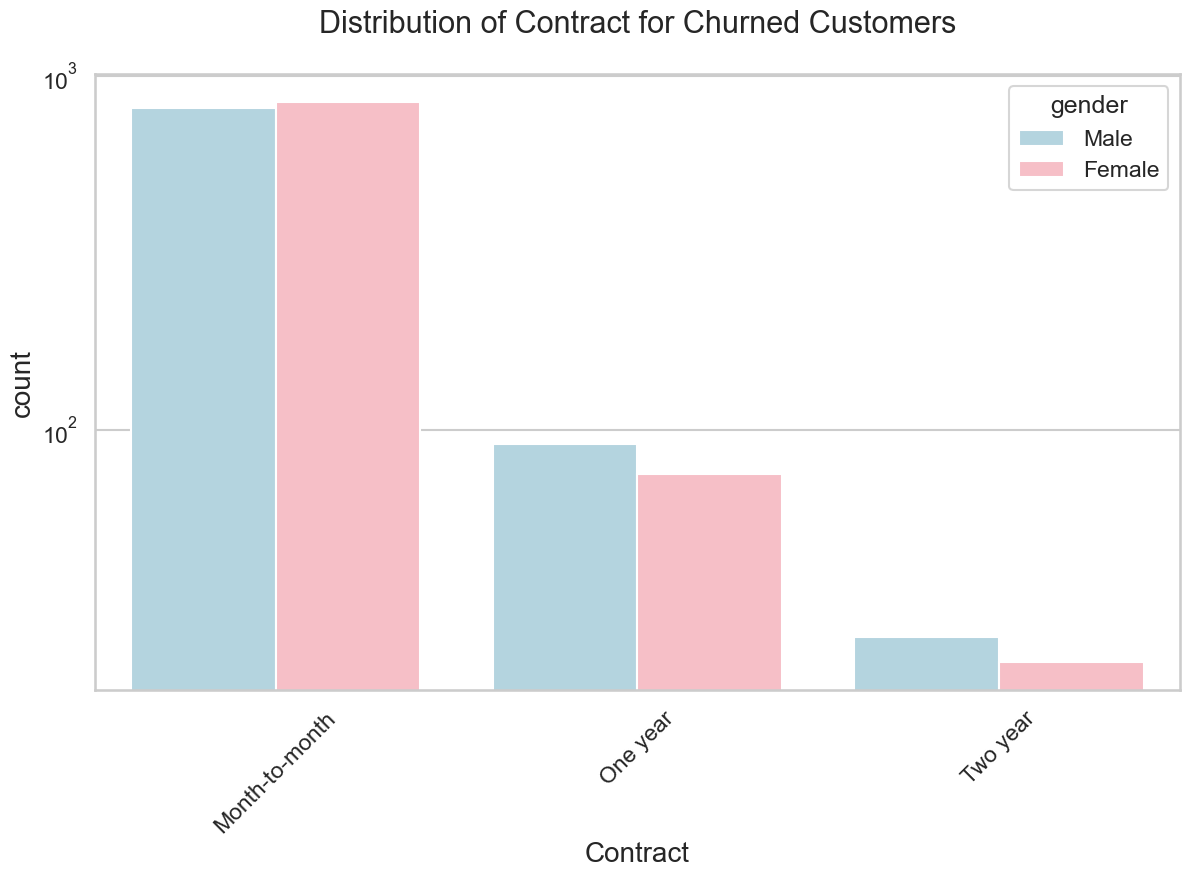

In [34]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',colors = ["lightblue", "lightpink"], hue='gender')

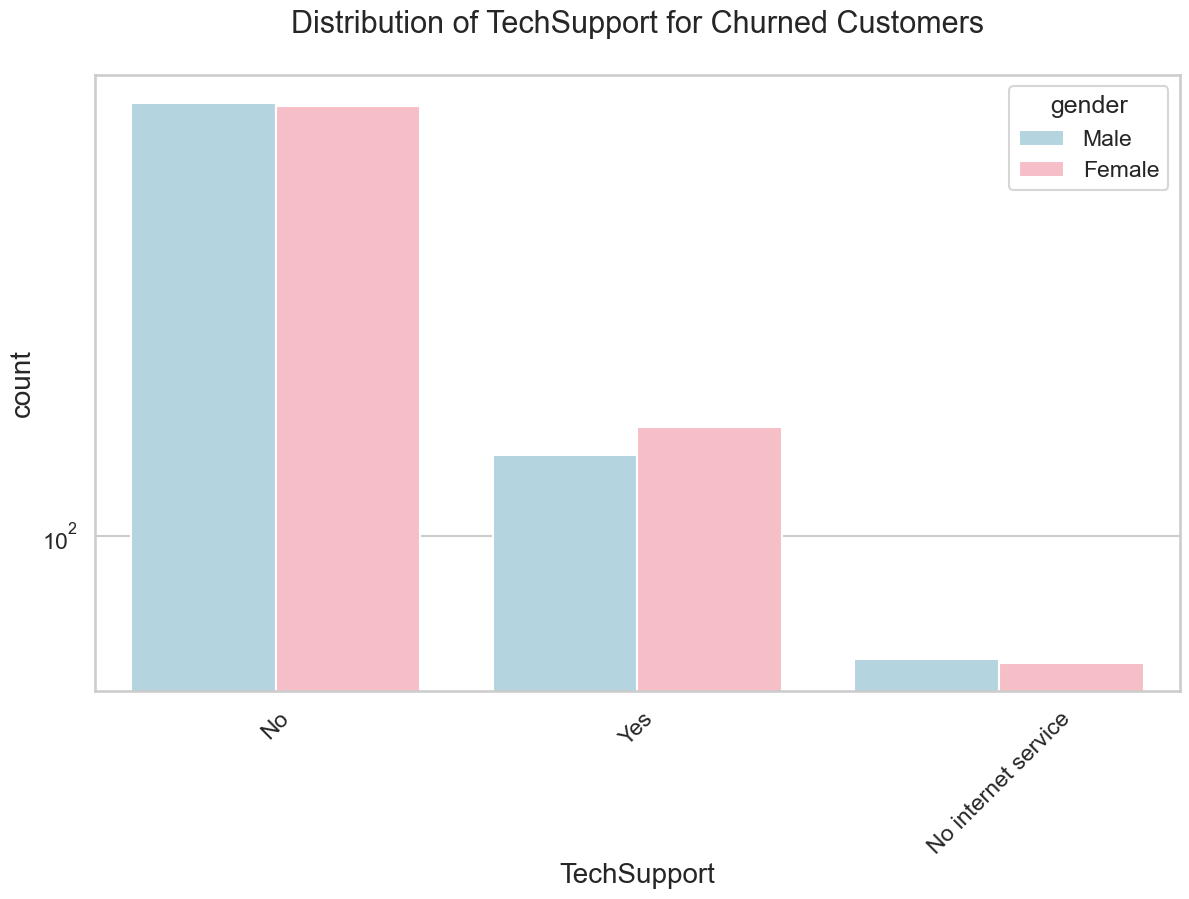

In [35]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',colors = ["lightblue", "lightpink"], hue='gender')

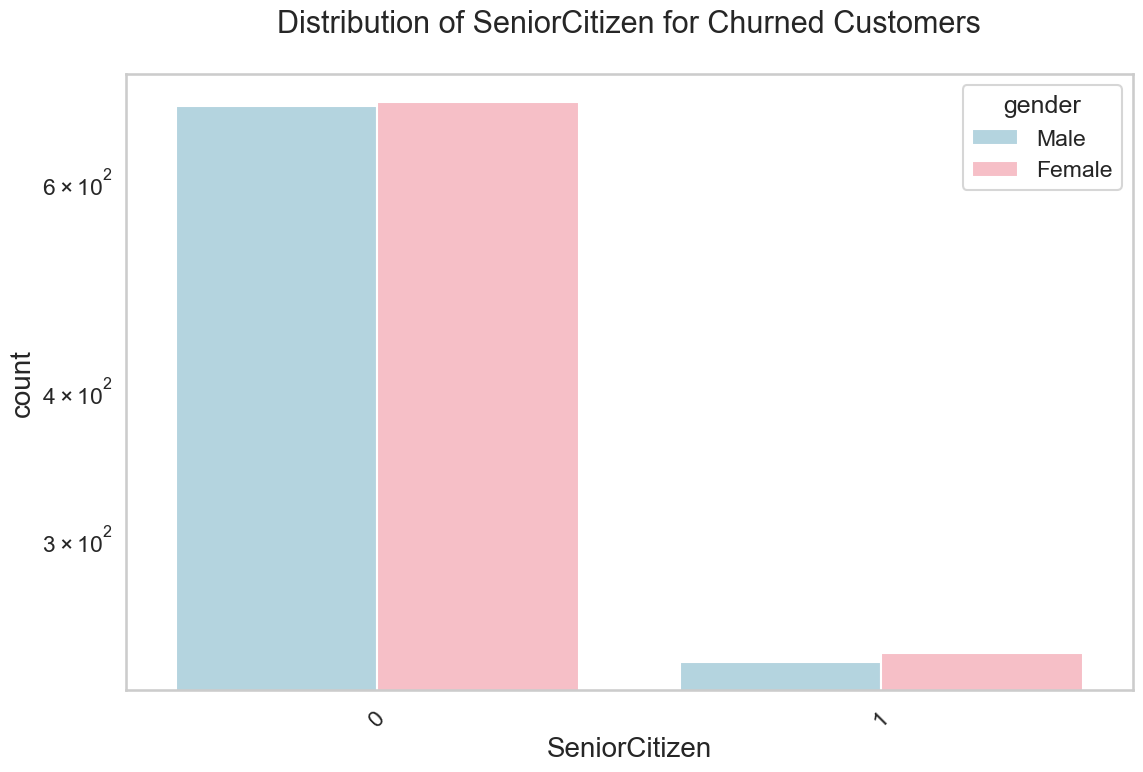

In [36]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',colors = ["lightblue", "lightpink"], hue='gender')

## CONCLUSION

<b>These are some of the quick insights :</b>

1.Electronic check medium are the highest churners

2.Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

3.No Online security, No Tech Support category are high churners

4.Non senior Citizens are high churners

In [37]:
telecom_data_dummies.to_csv('Telecom_Churn (after EDA).csv')